In [2]:
import sys
import os
import urllib.request
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation
import re 
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
NEWS_PATH = os.path.join("datasets","news")
if not os.path.isdir(NEWS_PATH):
  os.makedirs(NEWS_PATH)

os.listdir()

['.git',
 '.github',
 '.gitignore',
 '.ipynb_checkpoints',
 '01_the_machine_learning_landscape.ipynb',
 '02_end_to_end_machine_learning_project.ipynb',
 '03_classification.ipynb',
 '04_training_linear_models.ipynb',
 '05_support_vector_machines.ipynb',
 '06_decision_trees.ipynb',
 '07_ensemble_learning_and_random_forests.ipynb',
 '08_dimensionality_reduction.ipynb',
 '09_unsupervised_learning.ipynb',
 '10_neural_nets_with_keras.ipynb',
 '11_training_deep_neural_networks.ipynb',
 '12_custom_models_and_training_with_tensorflow.ipynb',
 '13_loading_and_preprocessing_data.ipynb',
 '14_deep_computer_vision_with_cnns.ipynb',
 '15_processing_sequences_using_rnns_and_cnns.ipynb',
 '16_nlp_with_rnns_and_attention.ipynb',
 '17_autoencoders_and_gans.ipynb',
 '18_reinforcement_learning.ipynb',
 '19_training_and_deploying_at_scale.ipynb',
 'apt.txt',
 'book_equations.pdf',
 'changes_in_2nd_edition.md',
 'datasets',
 'docker',
 'env',
 'environment.yml',
 'extra_autodiff.ipynb',
 'extra_gradient_des

In [7]:
FAKE_URL = "https://drive.google.com/uc?export=download&id=19zZdsjYjBySE4xLk1TbuPjUMdohQC3xT"
fake_file = os.path.join(NEWS_PATH, "FakeNews.csv")
urllib.request.urlretrieve(FAKE_URL, fake_file)

TRUE_URL = "https://drive.google.com/uc?export=download&id=1Je7-NjUyxlz-YgdGDLfO1dNUg68-i4Ce"
true_file  = os.path.join(NEWS_PATH, "TrueNews.csv")
urllib.request.urlretrieve(TRUE_URL, true_file)

('datasets\\news\\FakeNews.csv', <http.client.HTTPMessage at 0x1ee50e9b148>)

('datasets\\news\\TrueNews.csv', <http.client.HTTPMessage at 0x1ee4ae00608>)

In [8]:
csv_true = os.path.join(NEWS_PATH, "TrueNews.csv")
true = pd.read_csv(csv_true)
csv_fake = os.path.join(NEWS_PATH, "FakeNews.csv")
fake = pd.read_csv(csv_fake)

In [9]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
true['category'] = 1
fake['category'] = 0

df = pd.concat([true,fake])

df.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

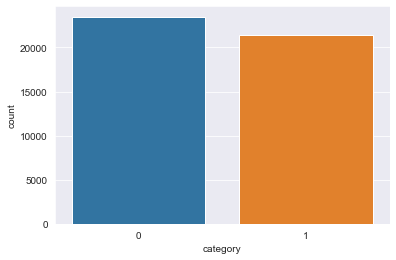

In [9]:
import seaborn as sns

sns.set_style("darkgrid")
sns.countplot(df.category)

In [12]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [13]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

NameError: name 'ax' is not defined

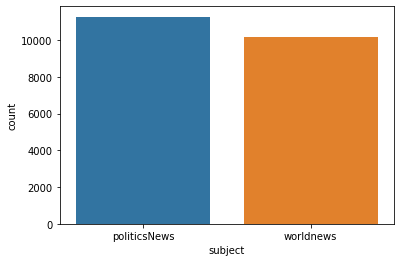

In [14]:
true_cat = sns.countplot(true.subject)

true_cat.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [15]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

[Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

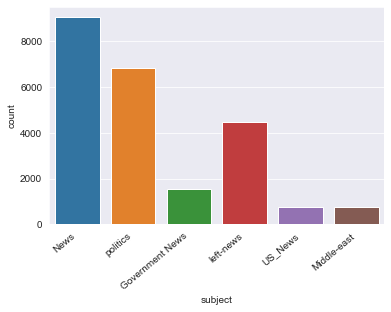

In [14]:
ax = sns.countplot(fake.subject)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [16]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [17]:
df.columns

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [18]:
del df['title']
del df['subject']
del df['date']

In [19]:
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['text'] = df['text'].apply(remove_stopwords)

In [20]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

df['text'] = normalize(df['text'])

In [21]:
features = df['text']
targets = df['category']

x_train,x_test,y_train,y_test = train_test_split(features, targets, test_size=0.2, random_state=7)

In [22]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [23]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

Accuracy: 99.59%


In [24]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[4651,   24],
       [  13, 4292]], dtype=int64)

In [25]:
# Classifier - Support Vector Machine
from sklearn import model_selection, svm
SVM = svm.SVC(C=1.9, kernel='linear')
SVM.fit(tfidf_train, y_train)
y_pred = SVM.predict(tfidf_test)
svm_cf_matrix = confusion_matrix(y_test, y_pred)

SVC(C=1.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
score_svm=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_svm*100,2)}%')

Accuracy: 99.6%


In [28]:
# Classifier - DecisionTree
from sklearn . tree import DecisionTreeClassifier
Dtr = DecisionTreeClassifier ( random_state =0)
Dtr.fit ( tfidf_train, y_train)
y_pred = Dtr.predict (tfidf_test)
score_Dtr=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_Dtr*100,2)}%')


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Accuracy: 99.53%


In [29]:
confusion_matrix(y_test,y_pred, labels=[0,1])

array([[4662,   13],
       [  29, 4276]], dtype=int64)